In [3]:
import pandas as pd
from textblob import TextBlob
import datetime 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [41]:
all_results = pd.read_csv(r"bisdata.csv")

In [42]:
all_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   k               487 non-null    object 
 1   Tweeted?        574 non-null    bool   
 2   submitted       574 non-null    object 
 3   uni             574 non-null    object 
 4   aff             574 non-null    object 
 5   year            522 non-null    float64
 6   body            574 non-null    object 
 7   additonal-info  92 non-null     object 
dtypes: bool(1), float64(1), object(6)
memory usage: 32.1+ KB


In [43]:
all_results[['polarity', 'subjectivity']] = all_results['body'].apply(lambda body: pd.Series(TextBlob(str(body)).sentiment))

In [44]:
all_results
all_results[all_results['polarity'] >= .5]

k  Tweeted?           submitted                         uni  \
304  NO POST     False  7/12/2020 22:54:56        Princeton University   
306  NO POST     False  7/13/2020 19:28:16        Princeton University   
308  NO POST     False  7/13/2020 23:07:08        Princeton University   
378  NO POST     False   8/3/2020 23:44:07        Princeton University   
420        Y      True  6/17/2020 12:15:57  University of Pennsylvania   

         aff    year                                               body  \
304  Student  2022.0  OP of the eating club post at Princeton U. I d...   
306  Student  2022.0  OP of the eating club post at Princeton U. I d...   
308  Student  2022.0  OP of the eating club post at Princeton U. I d...   
378  Student     NaN  Can you please be better about posting the cor...   
420   Alumni  1997.0  Having a Physics professor tell you that my ki...   

    additonal-info  polarity  subjectivity  
304            NaN     0.700           0.9  
306            NaN     0.700           0.9  
308            NaN     0.700           0.9  
378            NaN     0.625           0.5  
420            NaN     0.650           0.9

<AxesSubplot:>

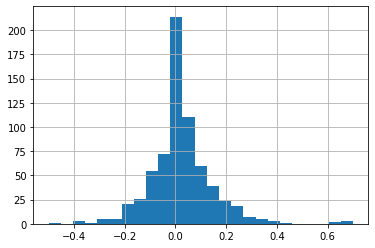

In [37]:
all_results['polarity'].hist(bins=25)

<AxesSubplot:>

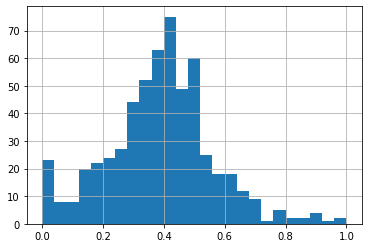

In [45]:
all_results['subjectivity'].hist(bins=25)

In [47]:
all_results['submitted'] = pd.to_datetime(all_results["submitted"], errors='coerce')
#all_results = all_results.dropna(subset=['submitted'])    
#all_results.drop(['index'], axis=1, inplace=True)
all_results

k  Tweeted?           submitted                         uni  \
0          Y      True 2020-06-15 11:22:27            Brown University   
1    NO POST     False 2020-06-17 21:51:42            Brown University   
2          Y     False 2020-06-18 14:10:28            Brown University   
3          Y      True 2020-06-21 15:29:57            Brown University   
4          Y      True 2020-06-21 15:37:27            Brown University   
..       ...       ...                 ...                         ...   
569        Y     False 2020-08-15 23:25:21             Yale University   
570        Y     False 2020-08-16 17:47:05             Yale University   
571        Y     False 2020-08-18 22:57:55             Yale University   
572      NaN     False 2020-12-19 00:25:05          Cornell University   
573      NaN     False 2021-03-15 11:15:03  University of Pennsylvania   

         aff    year                                               body  \
0    Student    20.0  Graduated this year and It still doesn’t sit w...   
1    Student     1.0  Love what you’re doing here and hope to see mo...   
2    Student  2022.0  During the first weeks of freshman year, my Hi...   
3    Student  2022.0  I had a white friend ask me if Black people ha...   
4    Student  2022.0  A white girl I used to be friends with freshma...   
..       ...     ...                                                ...   
569  Student  2024.0  My friend was crushed after she didn’t get int...   
570   Alumni  2017.0  I (bi-racial female) dated a white male athlet...   
571  Student  2021.0  Freshman year our professor would often ask us...   
572  Student     NaN  Members of Cornell Republicans collaborated wi...   
573  Student  2024.0  Last semester I had received a few packages an...   

    additonal-info  polarity  subjectivity  
0              NaN -0.500000      1.000000  
1              NaN  0.050000      0.625000  
2              NaN  0.160979      0.372266  
3              NaN -0.013889      0.202778  
4              NaN  0.065625      0.225000  
..             ...       ...           ...  
569            NaN  0.037500      0.150000  
570            NaN -0.031250      0.237500  
571            NaN  0.016171      0.318552  
572            NaN  0.093333      0.200000  
573            NaN -0.096429      0.317857  

[574 rows x 10 columns]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\evesu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evesu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
4824


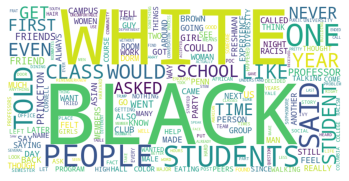

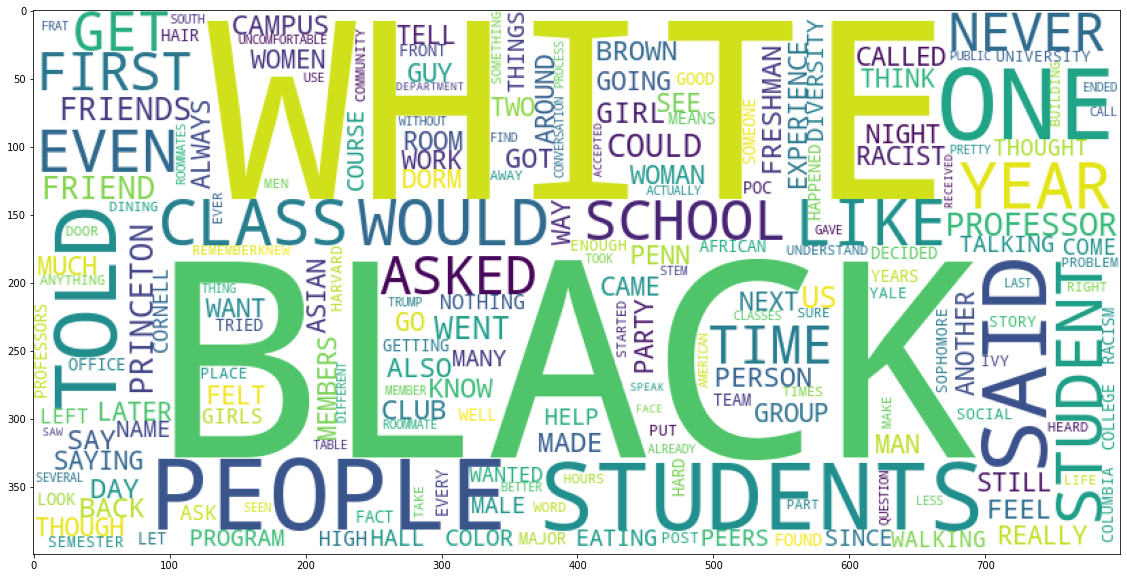

In [50]:
body = all_results.body.str.cat(sep=' ')
nltk.download('punkt')

tokens = word_tokenize(body)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokens = [w.upper() for w in tokens if (not w.lower() in stop_words) and (w.isalpha())]

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

#this creates a wordcloud of all of the most commen alphanumeric words across all decades in the article body
wordcloud = WordCloud(width=800, height=400, background_color="white")
WordCloud.generate_from_frequencies(wordcloud, frequency_dist, max_font_size=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)


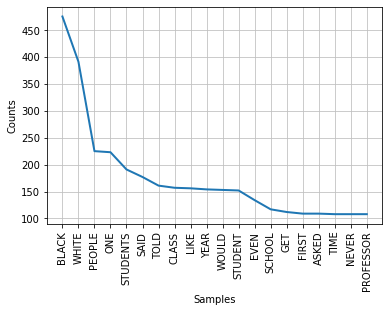

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [51]:
frequency_dist.plot(20)

In [72]:
stop_words = set(stopwords.words('english'))

#same function as above by generic for any dataframe's body element
def get_freq_dist(table):
    text = table.body.str.cat(sep=' ')
    
    tempTokens = word_tokenize(text)
    tempTokens = [w.upper() for w in tempTokens if (not w.lower() in stop_words) and (w.isalpha())]

    vocabulary = set(tempTokens)

    frequency_dist = nltk.FreqDist(tempTokens)

    return frequency_dist

def get_wordcloud (frequency_dist):
    wordcloud = WordCloud(width=800, height=400, background_color="white")
    WordCloud.generate_from_frequencies(wordcloud, frequency_dist, max_font_size=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud)

In [58]:
#get list of schools 
schools=all_results["uni"]
schools = list(set(schools))
schools

['Dartmouth College',
 'Harvard University',
 'Columbia University',
 'Yale University',
 'Princeton University',
 'Cornell University',
 'University of Pennsylvania',
 'Brown University']

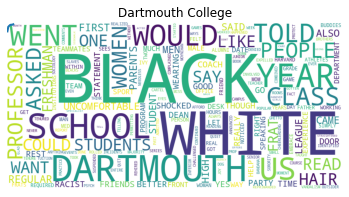

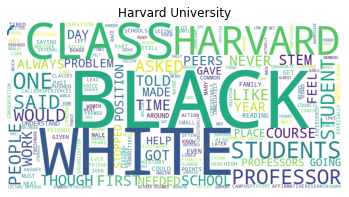

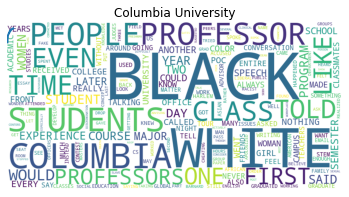

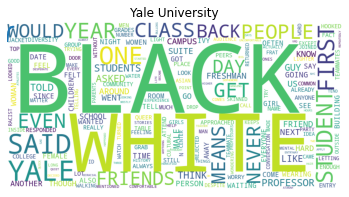

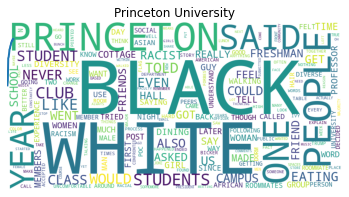

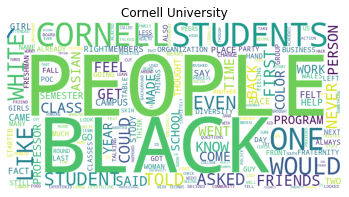

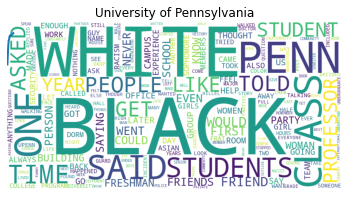

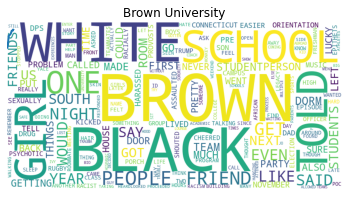

In [71]:
#word clouds for every decade's body text
for school in schools: 
    table = all_results[all_results["uni"] == school]
    fd = get_freq_dist(table)

    plt.title(school)
    get_wordcloud(fd)

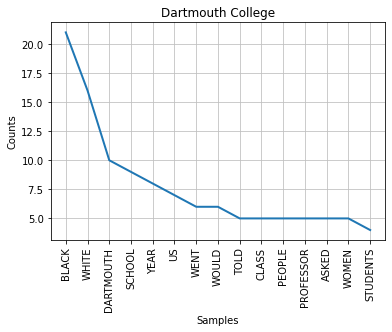

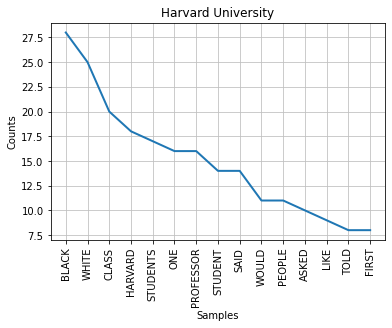

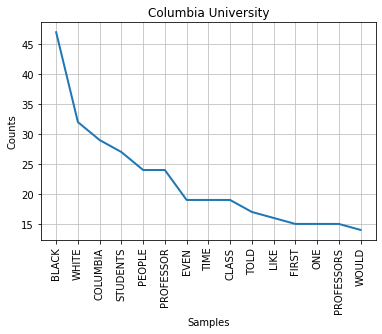

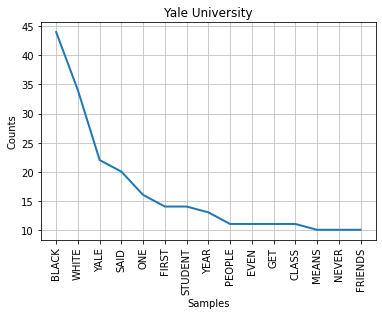

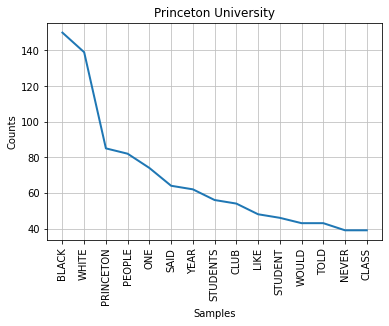

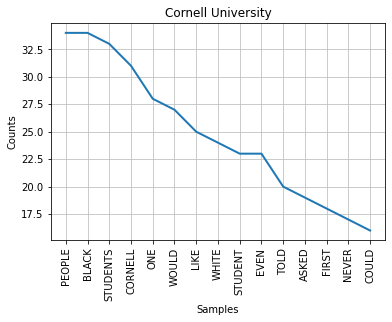

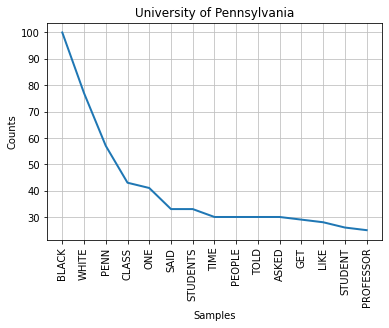

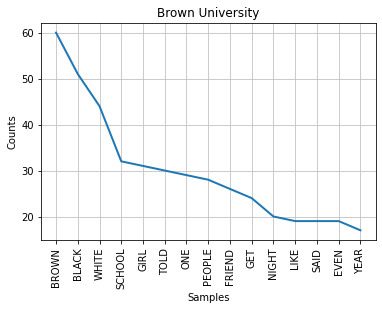

In [73]:
#line graphs for every decade's body text
for school in schools: 
    table = all_results[all_results["uni"] == school]
    fd = get_freq_dist(table)

    plt.title(school)
    fd.plot(15)
    